# Sample data Analysis Interview / takehome Challenge 

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious company to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

Source: Springboard

##### Import library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import warnings
warnings. filterwarnings('ignore')

In [45]:
# Opening JSON file 
f = open('ultimate_data_challenge.json')   

# returns JSON object as a dictionary 
dataset = json.load(f)

#create dataframe
df1 = pd.DataFrame(dataset)

##### Part 1 ‑Exploratory data analysis

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize theunderlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [46]:
# Opening JSON file 
f = open('logins.json')   

# returns JSON object as a dictionary 
dataset = json.load(f)

#create dataframe
df2 = pd.DataFrame(dataset)

In [47]:
df2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [48]:
df2.login_time = pd.to_datetime(df2.login_time)

In [49]:
df2['count'] = 1

In [50]:
df2.set_index('login_time',inplace=True)

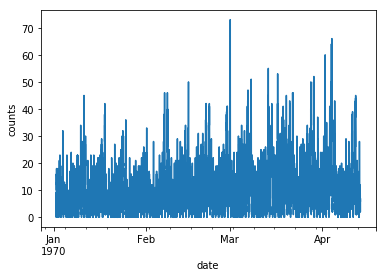

In [51]:
df2 = df2.resample('15min').sum()
_=df2.plot(legend=False)
_=plt.xlabel('date')
_=plt.ylabel('counts')

From the 15 min plot above, we can see that there is periodic spike in counts of login. The plot is very noisy

In [52]:
dummy_df2.head()

,count
login_time,
1970-01-01 20:00:00,21087
1970-01-31 20:00:00,26561
1970-03-02 20:00:00,32592
1970-04-01 20:00:00,12902


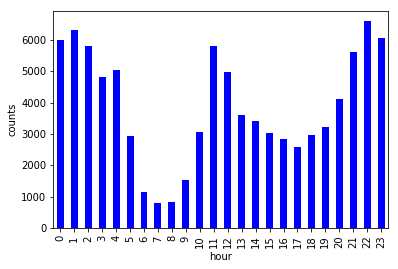

In [53]:
dummy_df2 = df2.resample('60min').sum()
dummy_df2['hr'] =dummy_df2.index.hour
dummy_df2.groupby('hr')['count'].sum().plot(kind='bar',color='b')
_=plt.xlabel('hour')
_=plt.ylabel('counts')

The plot above represents the hourly frequency of logins. Busy hours are at night and couple of hours during day time

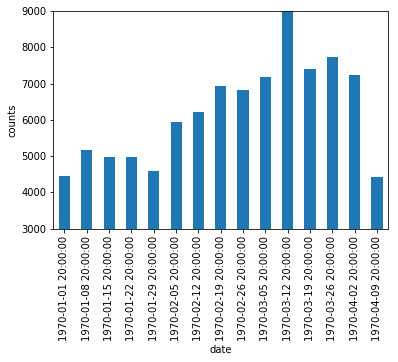

In [54]:
dummy_df2 = df2.resample('7D').sum()
_=dummy_df2.plot(kind='bar',legend=False,ylim=[3000,9000])
_=plt.xlabel('date')
_=plt.ylabel('counts')

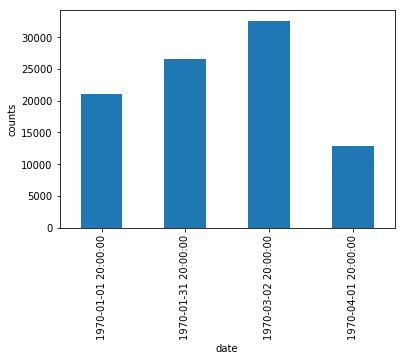

In [55]:
dummy_df2 = df2.resample('60min').sum()
dummy_df2 = df2.resample('30D').sum()
_=dummy_df2.plot(kind='bar',legend=False)
_=plt.xlabel('date')
_=plt.ylabel('counts')

The 7 day and 30 day plot of login counts show that the the number of logins increases at around 25% and 20% in the from two months. However, logins decreased my 66% in the third month, which is alarming.

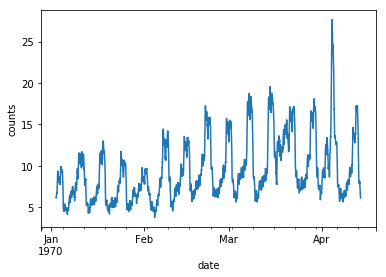

In [56]:
df2 = df2.resample('15min').sum()
df2.rolling(window =90).mean().plot(legend=False)
_=plt.xlabel('date')
_=plt.ylabel('counts')

Rolling average mean shows a surge in demand in the weekends

In [57]:
datetime.date(1970,4,1).weekday()

2

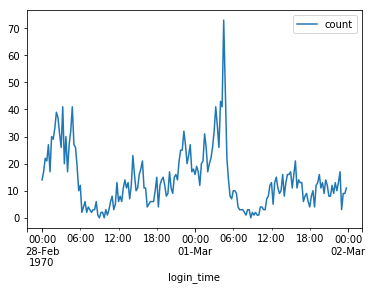

In [58]:
df2.loc['1970-02-28':'1970-03-1'].plot()

Looking closely at the hourly logins in a weekend, we can see that there is a surge in logins during midnight  

In summary, the highlights are:

- Logins are high in weekends compared to weekdays
- Logins are high at around midnight and couple of hours in the morning window
- Need to investigate further using more data about the 66% drop of login in the month of April compared to March.


##### Part 2 ‑Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a. How you will implement the experiment

    b. What statistical test(s) you will conduct to verify the significance of the observation

    c. How you would interpret the results and provide recommendations to the city operations team along with any caveats.

Answer:  

Ideally, the cost of operation is at minimum if there are partner drivers in both the cities to cater the traffic. However, since the Ultimate managers are incentivizing drivers with free toll costs, it can be assumed that there is an imbalance between partner driver as well as drive requests.

In this scenario, the problem is to formulate an optimization problem and find the minimum cost of the optimization. 

costs: 

- If ultimate can't serve requests due to lack of drivers in a city, it will loose revenew and customers confidence.

- The cost of toll each time driver crosses the bridge

benefits:

- less drivers can serve operating the two cities.
- Traffic imbalance issue is resolved. 

With this at hand, i would like to define the following metric:


beta = ((revenue by drivers crossing the bridges - total toll) / number of drivers crossing the bridge) /
            ((revenue by drivers not crossing the bridges) / number of drivers not crossing the bridge)
            
where beta > 1 indicates that we should promote drivers crossing the bridge and beta <1 indicates that we should find optimal number of drivers in each city to cater the traffic.





##### Part 3: Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Data description

●city: city this user signed up in

●phone: primary device for this user

●signup_date: date of account registration; in the form ‘YYYY MM DD’

●last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

●avg_dist: the average distance in miles per trip taken in the first 30 days after signup

●avg_rating_by_driver: the rider’s average rating over all of their trips

●avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

●surge_pct: the percent of trips taken with surge multiplier > 1

●avg_surge: The average surge multiplier over all of this user’s trips

●trips_in_first_30_days: the number of trips this user took in the first 30 days aftersigning up

●ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;FALSE otherwise

●weekday_pct: the percent of the user’s trips occurring during a weekday

In [70]:
# Opening JSON file 
f = open('ultimate_data_challenge.json')   

# returns JSON object as a dictionary 
dataset = json.load(f)

#create dataframe
df = pd.DataFrame(dataset)



In [71]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [72]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [74]:
# city-wise counts of requests

df.city.value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

In [75]:
# Phone-wise counts of requests

df.phone.value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [76]:
# ultimate_black_user wise counts of requests

df.ultimate_black_user.value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [77]:
# On hot encoding for the categorical features

df = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'],drop_first=True)

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,1,0,0


In [78]:
# convert time from string to datetime objects

df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [79]:
df.last_trip_date.describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

The last trip is on 2014-07-01 00:00:00. So, the data was taken on 2014-07-01

In [80]:
### What fraction of the observed users were retained?

(df.last_trip_date>='2014-06-01').sum()/len(df.last_trip_date)

df['active'] = 0
df.active[df.last_trip_date> df.signup_date+ datetime.timedelta(days=150)] = df[df.last_trip_date> df.signup_date+ datetime.timedelta(days=150)].active +1

print ('fraction of the observed users retained is:',df.active.sum()/len(df))

fraction of the observed users retained is: 0.24396


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                    50000 non-null float64
avg_rating_by_driver        49799 non-null float64
avg_rating_of_driver        41878 non-null float64
avg_surge                   50000 non-null float64
last_trip_date              50000 non-null datetime64[ns]
signup_date                 50000 non-null datetime64[ns]
surge_pct                   50000 non-null float64
trips_in_first_30_days      50000 non-null int64
weekday_pct                 50000 non-null float64
city_King's Landing         50000 non-null uint8
city_Winterfell             50000 non-null uint8
phone_iPhone                50000 non-null uint8
ultimate_black_user_True    50000 non-null uint8
active                      50000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(2), uint8(4)
memory usage: 4.0 MB


In [82]:
#missing data

print('Missing data (avg_rating_by_driver):', df.avg_rating_by_driver.isnull().sum())
print('Missing data (avg_rating_of_driver):', df.avg_rating_of_driver.isnull().sum())

Missing data (avg_rating_by_driver): 201
Missing data (avg_rating_of_driver): 8122


In [83]:
# fill missing data using mean value

df.avg_rating_by_driver.fillna(np.mean(df.avg_rating_by_driver),inplace=True)
df.avg_rating_of_driver.fillna(np.mean(df.avg_rating_of_driver),inplace=True)

In [84]:
# data set is imbalanced

df.active.value_counts(normalize=True)


0    0.75604
1    0.24396
Name: active, dtype: float64

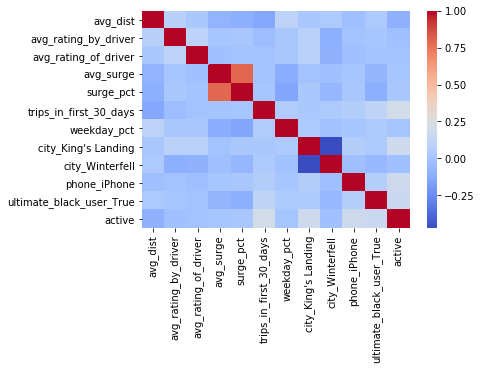

In [90]:
import seaborn as sns

_=sns.heatmap(df.corr(),cmap ='coolwarm')

In [93]:
df.corr()['active'].sort_values(ascending=False)

active                      1.000000
trips_in_first_30_days      0.204841
city_King's Landing         0.180708
phone_iPhone                0.176607
ultimate_black_user_True    0.159157
surge_pct                   0.017045
avg_surge                   0.006267
weekday_pct                 0.005518
avg_rating_of_driver       -0.008363
city_Winterfell            -0.020727
avg_rating_by_driver       -0.022311
avg_dist                   -0.091802
Name: active, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split

X = df.drop(['active','last_trip_date','signup_date'],axis=1)
y= df.active
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [121]:
X.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct',
       'city_King's Landing', 'city_Winterfell', 'phone_iPhone',
       'ultimate_black_user_True'],
      dtype='object')

In [122]:
# upsampling to balance the dataset

from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.active==0]
fraud = X[X.active==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])
upsampled.active.value_counts()

1    33998
0    33998
Name: active, dtype: int64

In [123]:
len(X_test)

5000

In [124]:
y_train = upsampled.active.values
X_train = upsampled.drop('active', axis=1).values

In [127]:
# Random Forest with hyperparameter tuning parameters
# importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
rf=RandomForestClassifier()

#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[50,150, 300],
          'min_samples_leaf':[2,5,10],
          'min_samples_split':[2,5,10]}

#Making models with hyper parameters sets
rf = GridSearchCV(rf, param_grid=params)
#Learning
rf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [50, 150, 300], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",rf.best_params_)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.7416


In [129]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.active.value_counts()

y_train = downsampled.active
X_train = downsampled.drop('active', axis=1)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_split=5,max_leaf_nodes=5)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
rf.fit(X_train,y_train)

#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))


Accuracy: 0.73


In [101]:
#with default hyper parameter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
clf = AdaBoostClassifier()
#Hyper Parameters Set
params = {'n_estimators':[50],
          'algorithm':['SAMME.R'],
          'learning_rate':[.3]}
#Making models with hyper parameters sets
clf1 = GridSearchCV(clf, param_grid=params, n_jobs=1)
#Learning
clf1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",clf1.best_params_)
#Prediction
prediction=clf1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

Best Hyper Parameters:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 50}
Accuracy: 0.7416
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3804
           1       0.47      0.75      0.58      1196

   micro avg       0.74      0.74      0.74      5000
   macro avg       0.69      0.74      0.70      5000
weighted avg       0.80      0.74      0.76      5000



In [130]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(prediction,y_test)
print('confusion matrix:')
print(cm)

confusion matrix:
[[2819  365]
 [ 985  831]]


In [103]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.active
X = df.drop(['active','last_trip_date','signup_date'],axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [104]:
rf = RandomForestClassifier(n_estimators=50,min_samples_split=5,max_leaf_nodes=5)
rf.fit(X_train,y_train)
smote_pred = rf.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(smote_pred,y_test))
from sklearn.metrics import classification_report
#evaluation(classification report)
# print(classification_report(y_test,prediction))
print ('recall: ',metrics.recall_score(smote_pred,y_test))
print ('f1-score: ',metrics.f1_score(smote_pred,y_test))

rf.feature_importances_

Accuracy: 0.75336
recall:  0.49739654699917785
f1-score:  0.5407418441829286


array([0.        , 0.33770244, 0.03578487, 0.11877781, 0.09810531,
       0.01280105, 0.0242047 , 0.06936104, 0.        , 0.2116238 ,
       0.09163896])

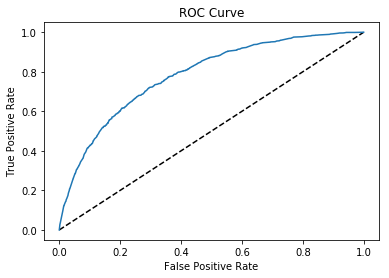

AUC: 0.7828786198238622
AUC scores computed using 5-fold cross-validation: [0.77531465 0.78229523 0.77433133 0.77637237 0.78112718]


In [106]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(rf, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [115]:
pd.DataFrame(rf.feature_importances_, index = X.columns,
             columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.337702
phone_iPhone,0.211624
avg_surge,0.118778
surge_pct,0.098105
ultimate_black_user_True,0.091639
city_King's Landing,0.069361
avg_rating_of_driver,0.035785
weekday_pct,0.024205
trips_in_first_30_days,0.012801
avg_dist,0.000000


In [117]:
display(df['avg_rating_by_driver'].corr(df['active']))
display(df['surge_pct'].corr(df['active']))
display(df['weekday_pct'].corr(df['active']))
display(df['phone_iPhone'].corr(df['active']))
display(df['ultimate_black_user_True'].corr(df['active']))

-0.02231086307319474

0.017045260622716593

0.005518083852162292

0.17660721522651857

0.15915669255155424

Correlation between avg_rating_by_driver and retention is negative but it is the most important feature by far

#### Summary:

From the analysis above, we can see find the most features that were used by the random forest model to (avg_rating_by_driver, phone_iPhone, avg_surge,surge_pct, ultimate_black_user_True, city_King's Landing)
The following observations can be leveraged to improve the retention rate:

1. avg rating by driver is by far the most important feature. To improve the accuracy, the company must improve the ride experence, which will improve the average driver rating as well as the retention. The company must use the average driver rating as a metric to improve the overall ride experience.

2. The company must increase the growth of ultimate black users

3. Also the company can increase the growth of surge pct users